In [2]:
##### Telecom Churn Case Study
##### Submitted by 
##### Aman Srivastava - amanit0812@gmail.com
##### Nurul Quamar Khan - noor.025@gmail.com
##### Tim Kumar  - timkoumar@gmail.com
##### Prakash Srinivasan  - Prakash.Srinivasan@techmahindra.com

## Importing Libraries

In [3]:
####Import required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb
import time

In [4]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


sns.set(style="white")
%matplotlib inline


## Importing Datasets

In [5]:
####Load the Dataset 
telecom_df = pd.read_csv("telecom_churn_data.csv")
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## High value Customers

In [7]:
####Selecting columns having recharge information
recharge_df=pd.concat([telecom_df.mobile_number,
                       telecom_df.loc[:,(telecom_df.columns.str.contains("rech") |
                                     telecom_df.columns.str.contains("rch"))]],axis=1)
recharge_df.head()

,mobile_number,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,...,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,7000842753,4,3,2,6,362,252,252,0,252,...,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
1,7001865778,4,9,11,5,74,384,283,121,44,...,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN
2,7001625959,5,4,2,7,168,315,116,358,86,...,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0
3,7001204172,10,11,18,14,230,310,601,410,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7000142493,5,6,3,4,196,350,287,200,56,...,NaN,NaN,0.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN


In [8]:
# we have total rech amt for month 6 and check whether any nan values are present
recharge_df['total_rech_amt_6'].isnull().sum()

0

In [9]:
# we have total rech amt for month 7 and check whether any nan values are present
recharge_df['total_rech_amt_7'].isnull().sum()

0

In [10]:
####Calculating average recharge amount and their distribution in the good phase 
recharge_df['avg_rech']=(recharge_df['total_rech_amt_6']+recharge_df['total_rech_amt_7'])/2
recharge_df['avg_rech'].describe(percentiles=[.25,.5,.70,.75,.90,.95,.99])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
70%        368.500000
75%        419.000000
90%        698.000000
95%        937.500000
99%       1590.000000
max      37762.500000
Name: avg_rech, dtype: float64

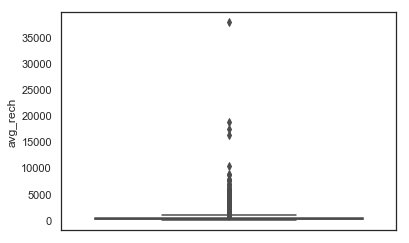

In [11]:
#plot them to check any outliers are present
sns.boxplot(y=recharge_df.avg_rech)
plt.show()

##### As you can see there are few outliers in the dataset.

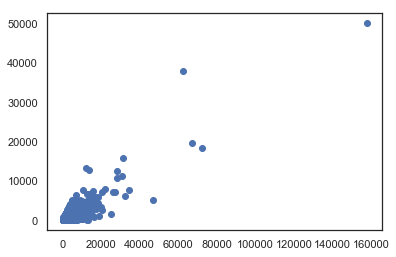

In [12]:
# Selecting columns having recharge and isd info.
recharge_vs_isd=pd.concat([telecom_df.loc[:,(telecom_df.columns.str.contains("total_rech_amt_") | telecom_df.columns.str.contains("isd_og_") )]],axis=1)
recharge_vs_isd.head()
recharge_vs_isd['Total_Rch']= recharge_vs_isd.iloc[:,-4:].sum(axis=1)
recharge_vs_isd['Total_Isd']= recharge_vs_isd.iloc[:,:-4].sum(axis=1)
plt.scatter(x=recharge_vs_isd.Total_Rch, y=recharge_vs_isd.Total_Isd)

##### Upon analysing the data , these outliers are mainly due to ISD call and hence we have decided not to elimnate them.

In [13]:
####Filtering High valued customers
print(recharge_df['avg_rech'].quantile(.70))
recharge_df_filtered=recharge_df[recharge_df['avg_rech']>=(recharge_df['avg_rech'].quantile(.70))]

368.5


In [14]:
####High Valued customer information
telecom_df_filtered=telecom_df.iloc[recharge_df_filtered.index,:]
telecom_df_filtered.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,3.001100e+04,30011.0,29897.0,29897.0,29897.0,30011.000000,30011.000000,30011.000000,30011.000000,29695.000000,...,30011.000000,11397.000000,11662.000000,11754.000000,11461.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7.001223e+09,109.0,0.0,0.0,0.0,587.284404,589.135427,534.857433,488.656197,299.184718,...,0.136550,0.897605,0.889813,0.837332,0.832126,1264.064776,129.439626,135.127102,121.360548,6.562685
std,6.846405e+05,0.0,0.0,0.0,0.0,442.722413,462.897814,492.259586,496.486834,462.202367,...,0.936441,0.303181,0.313136,0.369078,0.373770,975.263117,390.478591,408.024394,389.726031,48.638658
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000641e+09,109.0,0.0,0.0,0.0,364.161000,365.004500,289.609500,239.184000,42.960000,...,0.000000,1.000000,1.000000,1.000000,1.000000,480.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001232e+09,109.0,0.0,0.0,0.0,495.682000,493.561000,452.091000,413.152000,128.330000,...,0.000000,1.000000,1.000000,1.000000,1.000000,914.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001814e+09,109.0,0.0,0.0,0.0,703.922000,700.788000,671.150000,635.553000,357.120000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1924.000000,1.600000,1.990000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000


##### There are around 30k high valued customers to be considered for further analysis

## Tagging churners

In [15]:
####Tag churners based on 4th month's data and call usage
telecom_df_filtered['churn']=0
telecom_df_filtered.loc[((telecom_df_filtered.total_ic_mou_9==0) & 
                    (telecom_df_filtered.total_og_mou_9==0) &
                    (telecom_df_filtered.vol_2g_mb_9==0) &
                    (telecom_df_filtered.vol_3g_mb_9==0)),'churn']=1
telecom_df_filtered.churn.describe()

count    30011.000000
mean         0.086402
std          0.280961
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [16]:
####Removing all attributes corresponding to churn phase
df_1=telecom_df_filtered.loc[:,~(telecom_df_filtered.columns.str.endswith("_9"))]
df_1.drop('sep_vbc_3g',axis=1,inplace=True)

In [17]:
churned = (sum(telecom_df_filtered['churn'])/len(telecom_df_filtered['churn'].index))*100
churned

8.64016527273333

##### We have highly imbalanced dataset with churn cases accounting only to 8.64%

In [18]:
#### Identify unique columns and remove them.
print(df_1.mobile_number.nunique())
print(df_1.circle_id.nunique())

30011
1


In [19]:
df_1['loc_og_t2o_mou'].describe()

count    29897.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64

In [20]:
df_1['std_og_t2o_mou'].describe()

count    29897.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64

##### There are 30011 records where mobile_number is unique identifier and data belong to the same circle id
##### Columns loc_og_t2o_mou & std_og_t2o_mou doesnt provide any information

In [21]:
#### Remove columns that has unique values.
df_2=df_1.drop(['mobile_number','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)

In [22]:
df_2.shape

(30011, 167)

##### After removing attributes of churn phase and other features that are not required for modelling we are down to 167 colummns

## Data Preprocessing

In [23]:
####Stats for columns with missing values
(round(100*(df_2.isnull().sum()/len(df_2.index)),2)).sort_values(ascending=False)

night_pck_user_6            62.02
date_of_last_rech_data_6    62.02
count_rech_3g_6             62.02
av_rech_amt_data_6          62.02
max_rech_data_6             62.02
total_rech_data_6           62.02
arpu_3g_6                   62.02
arpu_2g_6                   62.02
count_rech_2g_6             62.02
fb_user_6                   62.02
night_pck_user_7            61.14
count_rech_2g_7             61.14
arpu_2g_7                   61.14
count_rech_3g_7             61.14
max_rech_data_7             61.14
av_rech_amt_data_7          61.14
fb_user_7                   61.14
arpu_3g_7                   61.14
total_rech_data_7           61.14
date_of_last_rech_data_7    61.14
arpu_3g_8                   60.83
date_of_last_rech_data_8    60.83
fb_user_8                   60.83
av_rech_amt_data_8          60.83
count_rech_2g_8             60.83
total_rech_data_8           60.83
count_rech_3g_8             60.83
max_rech_data_8             60.83
night_pck_user_8            60.83
arpu_2g_8     

In [24]:
####Identifying columns having mobile internet information
data_cols=[col for col in df_2.columns if (('mou' not in col) and col.endswith('_6'))]
data_cols

['last_date_of_month_6',
 'arpu_6',
 'og_others_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6']

In [25]:
mob_internet_cols=['total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6',
                   'vol_2g_mb_6','vol_3g_mb_6','arpu_3g_6','arpu_2g_6','night_pck_user_6',
                   'monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6','fb_user_6']
df_2[mob_internet_cols].describe()

,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
count,11397.000000,11397.000000,11397.000000,11397.000000,11397.000000,30011.000000,30011.000000,11397.000000,11397.000000,11397.000000,30011.000000,30011.000000,30011.000000,30011.000000,11397.000000
mean,2.467491,149.856629,1.646398,0.821093,238.908848,78.859009,258.392681,142.191067,132.278321,0.027288,0.124854,0.500383,0.173903,0.137916,0.897605
std,2.950082,124.714191,2.492688,1.603956,246.689608,277.445058,866.195376,255.296779,225.619174,0.162928,0.374512,1.699665,0.574285,0.875528,0.303181
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-30.280000,-15.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,41.000000,0.000000,0.000000,98.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,154.000000,1.000000,0.000000,177.000000,0.000000,0.000000,22.070000,40.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,198.000000,2.000000,1.000000,296.000000,14.450000,0.000000,212.170000,212.170000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,61.000000,1555.000000,39.000000,29.000000,7546.000000,10285.900000,45735.400000,6362.280000,6433.760000,1.000000,4.000000,39.000000,14.000000,29.000000,1.000000


##### Based on the above data, only few columns have complete information and among them only vol_2g_mb and vol_3g_mb looks more relevant

In [26]:
####Filtering based on no internet recharge and no data usage
df_2.loc[((df_2.total_rech_data_6.isnull()) & (df_2.vol_2g_mb_6==0) & (df_2.vol_3g_mb_6==0))][['vol_2g_mb_6',
                    'vol_3g_mb_6','total_rech_data_6','max_rech_data_6','av_rech_amt_data_6','arpu_3g_6',
                    'arpu_2g_6','night_pck_user_6','count_rech_2g_6','count_rech_3g_6']].head(5)

,vol_2g_mb_6,vol_3g_mb_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,count_rech_2g_6,count_rech_3g_6
7,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### We can fill-in few of the internet-column  info based on the recharge amount and data usage
##### If recharge=0 and Data_Usage =0, lets impute the other relevant column values to 0

In [27]:
####Imputing values for missing columns
df_2.loc[((df_2.total_rech_data_6.isnull()) & (df_2.vol_2g_mb_6==0) & (df_2.vol_3g_mb_6==0)),
                    ['total_rech_data_6','max_rech_data_6','av_rech_amt_data_6','arpu_3g_6',
                     'arpu_2g_6','night_pck_user_6','count_rech_2g_6','count_rech_3g_6']]=0

df_2.loc[((df_2.total_rech_data_7.isnull()) & (df_2.vol_2g_mb_7==0) & (df_2.vol_3g_mb_7==0)),
                    ['total_rech_data_7','max_rech_data_7','av_rech_amt_data_7','arpu_3g_7',
                     'arpu_2g_7','night_pck_user_7','count_rech_2g_7','count_rech_3g_7']]=0

df_2.loc[((df_2.total_rech_data_8.isnull()) & (df_2.vol_2g_mb_8==0) & (df_2.vol_3g_mb_8==0)),
                    ['total_rech_data_8','max_rech_data_8','av_rech_amt_data_8','arpu_3g_8',
                     'arpu_2g_8','night_pck_user_8','count_rech_2g_8','count_rech_3g_8']]=0

In [28]:
#### Let us check once again the stats for columns with missing values
(round(100*(df_2.isnull().sum()/len(df_2.index)),2)).sort_values(ascending=False)

date_of_last_rech_data_6    62.02
fb_user_6                   62.02
fb_user_7                   61.14
date_of_last_rech_data_7    61.14
fb_user_8                   60.83
date_of_last_rech_data_8    60.83
spl_og_mou_8                 3.13
loc_og_mou_8                 3.13
std_og_t2t_mou_8             3.13
std_og_t2m_mou_8             3.13
std_og_t2f_mou_8             3.13
std_og_t2c_mou_8             3.13
loc_ic_t2t_mou_8             3.13
std_og_mou_8                 3.13
isd_og_mou_8                 3.13
ic_others_8                  3.13
og_others_8                  3.13
loc_og_t2f_mou_8             3.13
isd_ic_mou_8                 3.13
spl_ic_mou_8                 3.13
std_ic_mou_8                 3.13
std_ic_t2f_mou_8             3.13
std_ic_t2m_mou_8             3.13
std_ic_t2t_mou_8             3.13
loc_ic_mou_8                 3.13
loc_ic_t2f_mou_8             3.13
loc_ic_t2m_mou_8             3.13
loc_og_t2c_mou_8             3.13
std_ic_t2o_mou_8             3.13
offnet_mou_8  

In [29]:
####Removing columns having more than 50% missing values
df_3=df_2.loc[:,~((round(100*(df_2.isnull().sum()/len(df_2.index)),2)>50))]
####Let us check once again the stats for columns with missing values
(round(100*(df_3.isnull().sum()/len(df_3.index)),2)).sort_values(ascending=False)

std_ic_t2f_mou_8        3.13
roam_ic_mou_8           3.13
loc_og_t2c_mou_8        3.13
ic_others_8             3.13
loc_og_mou_8            3.13
loc_og_t2f_mou_8        3.13
isd_ic_mou_8            3.13
spl_og_mou_8            3.13
loc_og_t2m_mou_8        3.13
spl_ic_mou_8            3.13
std_og_t2c_mou_8        3.13
loc_og_t2t_mou_8        3.13
std_ic_mou_8            3.13
roam_og_mou_8           3.13
std_og_t2t_mou_8        3.13
std_ic_t2o_mou_8        3.13
isd_og_mou_8            3.13
offnet_mou_8            3.13
std_ic_t2m_mou_8        3.13
std_og_t2m_mou_8        3.13
onnet_mou_8             3.13
std_ic_t2t_mou_8        3.13
loc_ic_t2t_mou_8        3.13
loc_ic_mou_8            3.13
std_og_mou_8            3.13
loc_ic_t2f_mou_8        3.13
std_og_t2f_mou_8        3.13
loc_ic_t2m_mou_8        3.13
og_others_8             3.13
date_of_last_rech_8     1.98
                        ... 
av_rech_amt_data_8      0.00
av_rech_amt_data_7      0.00
total_ic_mou_7          0.00
total_ic_mou_8

##### Few of the call-related columns have missing values and there is a pattern among the missing value columns. Let's understand the correlation between columns to see how we can deal with remaining missing values

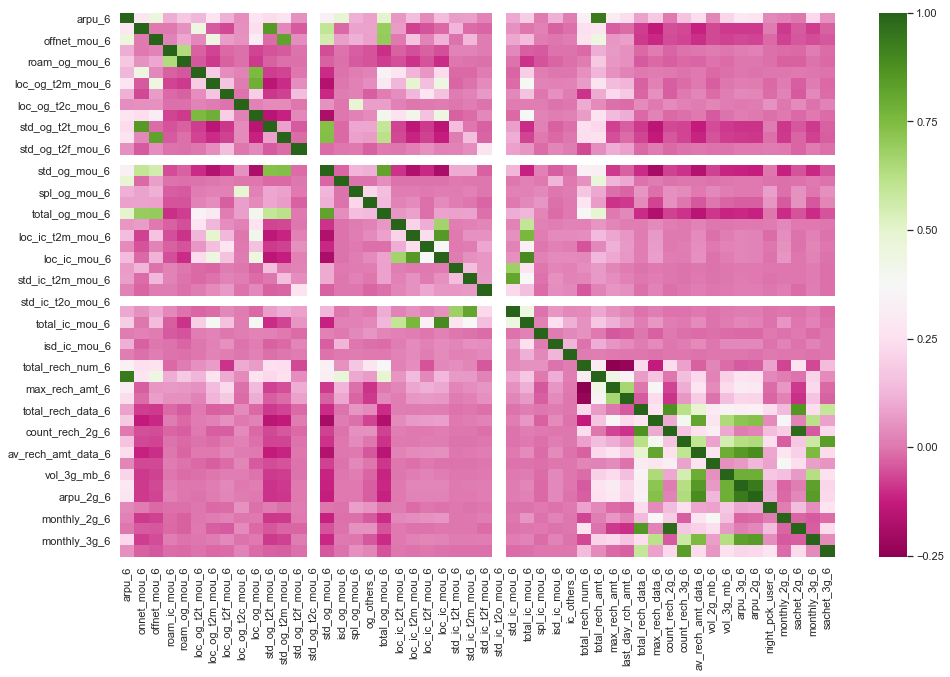

In [30]:
eda_1=df_3.loc[:,(df_3.columns.str.contains("_6"))]
plt.figure(figsize=(16,10))    
sns.heatmap(eda_1.corr(),cmap="PiYG")

##### Its clear that there is correlation within outgoing call columns, incoming call columns and internet-info columns
##### On further analysis we can establish that , for outgoing calls
#####    loc_og_mou=loc_og_t2t_mou + loc_og_t2m_mou +  loc_og_t2f_mou (+) loc_og_t2c_mou
#####    std_og_mou= std_og_t2t_mou + std_og_t2m_mou + std_og_t2f_mou
#####    total_og_mou=loc_og_mou +  std_og_mou + isd_og_mou + spl_og_mou + og_others
##### Same is true for incoming calls. So the data is highly multicollinear

In [31]:
####For the action lets analyse the missing value columns. Its to be noted that we have complete information on arpu, total_og_mou and total_ic_mou  
cols=[col for col in df_3.columns if (df_3[col].isnull().any() and col.endswith('_8'))]
cols.extend(['arpu_8','total_og_mou_8','total_ic_mou_8'])
temp=pd.DataFrame(df_3[(df_3.onnet_mou_8.isnull())],columns=cols)
temp.head(10)

,last_date_of_month_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,date_of_last_rech_8,arpu_8,total_og_mou_8,total_ic_mou_8
111,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8/24/2014,0.00,0.0,0.0
143,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8/28/2014,0.00,0.0,0.0
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0
358,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8/29/2014,707.91,0.0,0.0
375,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8/15/2014,0.00,0.0,0.0
490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0
527,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8/31/2014,0.00,0.0,0.0
539,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8/1/2014,0.00,0.0,0.0
578,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0
690,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0


##### Based on above description of data and relationship among features, we can try to impute few of the missing value
##### One conclusion would be, if revenue< 'certain value close to 0' and total incoming + outgoing call =0, we can impute the call related missing values 

In [32]:
####Selecting a revenue threshold of 50 and imputing values based on the existing information available
####Existing info considered for calculating avg impute values-> arpu , total_og_mou and total_ic_mou

null_cols=[col for col in df_3.columns if (df_3[col].isnull().any())]

def imputeValues(df,col_name):
    if col_name.endswith('_6') and (('ic_' in col_name) or ('og_' in col_name) or ('mou' in col_name)):
        df.loc[((df[col_name].isnull()) & (df['total_og_mou_6']==0) & (df['total_ic_mou_6']==0) &
                (df['arpu_6']<=50) &(df['arpu_2g_6']==0) & (df['arpu_3g_6']==0)),
                col_name]=df[((df.arpu_6==0)&(df.total_og_mou_6==0)&(df.total_ic_mou_6==0))][col_name].mean() 
        
        
    if col_name.endswith('_7') and (('ic_' in col_name) or ('og_' in col_name) or ('mou' in col_name)):
        df.loc[((df[col_name].isnull()) & (df['total_og_mou_7']==0) & (df['total_ic_mou_7']==0) &
                (df['arpu_7']<=50) &(df['arpu_2g_7']==0) & (df['arpu_3g_7']==0)),
                col_name]=df[((df.arpu_7==0)&(df.total_og_mou_7==0)&(df.total_ic_mou_7==0))][col_name].mean()
    
        
    if col_name.endswith('_8') and (('ic_' in col_name) or ('og_' in col_name) or ('mou' in col_name)):
        df.loc[((df[col_name].isnull()) & (df['total_og_mou_8']==0) & (df['total_ic_mou_8']==0) &
                (df['arpu_8']<=50) &(df['arpu_2g_8']==0) & (df['arpu_3g_8']==0)),
                col_name]=df[((df.arpu_8==0)&(df.total_og_mou_8==0)&(df.total_ic_mou_8==0))][col_name].mean()
        
for col_name in null_cols:
    imputeValues(df_3,col_name)

In [33]:
#### Let us check once again the stats for columns with missing values
(round(100*(df_3.isnull().sum()/len(df_3.index)),2)).sort_values(ascending=False)

date_of_last_rech_8     1.98
isd_og_mou_6            0.56
ic_others_6             0.56
loc_og_mou_6            0.56
std_og_t2t_mou_6        0.56
std_og_t2m_mou_6        0.56
std_og_t2f_mou_6        0.56
std_og_t2c_mou_6        0.56
std_og_mou_6            0.56
spl_og_mou_6            0.56
og_others_6             0.56
isd_ic_mou_6            0.56
loc_og_t2f_mou_6        0.56
spl_ic_mou_6            0.56
loc_ic_t2t_mou_6        0.56
std_ic_mou_6            0.56
std_ic_t2o_mou_6        0.56
std_ic_t2f_mou_6        0.56
std_ic_t2m_mou_6        0.56
std_ic_t2t_mou_6        0.56
loc_ic_mou_6            0.56
loc_ic_t2f_mou_6        0.56
loc_og_t2c_mou_6        0.56
loc_ic_t2m_mou_6        0.56
roam_og_mou_6           0.56
loc_og_t2t_mou_6        0.56
roam_ic_mou_6           0.56
onnet_mou_6             0.56
offnet_mou_6            0.56
loc_og_t2m_mou_6        0.56
                        ... 
av_rech_amt_data_8      0.00
av_rech_amt_data_7      0.00
total_ic_mou_7          0.00
total_ic_mou_8

##### After Missing value  imputation, we can still see few columns with missing data and again there is a pattern to it as well.
##### Since they are only few in number lets delete the correpsonding rows as long as it doesn't remove much of churn related info

In [34]:
####Removing rows that dont have few of the first month's data
df_4=df_3.loc[~(df_3['onnet_mou_6'].isnull()),:]
(round(100*(df_4.isnull().sum()/len(df_4.index)),2)).sort_values(ascending=False)

date_of_last_rech_8     1.91
last_date_of_month_8    0.48
date_of_last_rech_7     0.33
std_ic_t2f_mou_8        0.20
og_others_8             0.20
loc_og_mou_8            0.20
std_og_t2t_mou_8        0.20
std_og_t2m_mou_8        0.20
std_og_t2f_mou_8        0.20
std_og_mou_8            0.20
date_of_last_rech_6     0.20
isd_og_mou_8            0.20
spl_og_mou_8            0.20
ic_others_8             0.20
loc_og_t2f_mou_8        0.20
isd_ic_mou_8            0.20
spl_ic_mou_8            0.20
loc_ic_t2t_mou_8        0.20
std_ic_mou_8            0.20
std_ic_t2o_mou_8        0.20
loc_ic_t2m_mou_8        0.20
std_ic_t2m_mou_8        0.20
loc_ic_t2f_mou_8        0.20
std_ic_t2t_mou_8        0.20
loc_og_t2c_mou_8        0.20
std_og_t2c_mou_8        0.20
loc_ic_mou_8            0.20
onnet_mou_8             0.20
roam_ic_mou_8           0.20
offnet_mou_8            0.20
                        ... 
total_rech_num_7        0.00
total_rech_num_6        0.00
ic_others_6             0.00
isd_ic_mou_6  

In [35]:
####Removing rows that dont have few of the third month's data
df_5=df_4.loc[~(df_4['onnet_mou_8'].isnull()),:]
(round(100*(df_5.isnull().sum()/len(df_5.index)),2)).sort_values(ascending=False)

date_of_last_rech_8     1.91
last_date_of_month_8    0.48
date_of_last_rech_7     0.33
date_of_last_rech_6     0.20
ic_others_7             0.07
spl_ic_mou_7            0.07
loc_og_t2f_mou_7        0.07
loc_ic_t2t_mou_7        0.07
isd_ic_mou_7            0.07
loc_og_t2c_mou_7        0.07
loc_og_mou_7            0.07
std_og_t2m_mou_7        0.07
std_og_t2t_mou_7        0.07
loc_ic_t2m_mou_7        0.07
og_others_7             0.07
std_og_t2f_mou_7        0.07
spl_og_mou_7            0.07
std_og_t2c_mou_7        0.07
std_og_mou_7            0.07
isd_og_mou_7            0.07
loc_og_t2m_mou_7        0.07
std_ic_t2m_mou_7        0.07
loc_ic_mou_7            0.07
offnet_mou_7            0.07
std_ic_t2t_mou_7        0.07
roam_og_mou_7           0.07
loc_ic_t2f_mou_7        0.07
std_ic_mou_7            0.07
roam_ic_mou_7           0.07
std_ic_t2o_mou_7        0.07
                        ... 
spl_ic_mou_6            0.00
total_ic_mou_8          0.00
total_ic_mou_7          0.00
total_ic_mou_6

In [36]:
####Removing rows that dont have few of the second month's data
df_6=df_5.loc[~(df_5['onnet_mou_7'].isnull()),:]
(round(100*(df_6.isnull().sum()/len(df_6.index)),2)).sort_values(ascending=False)

date_of_last_rech_8     1.90
last_date_of_month_8    0.47
date_of_last_rech_7     0.33
date_of_last_rech_6     0.20
last_date_of_month_7    0.05
isd_og_mou_7            0.00
og_others_8             0.00
og_others_7             0.00
og_others_6             0.00
spl_og_mou_8            0.00
spl_og_mou_7            0.00
spl_og_mou_6            0.00
isd_og_mou_8            0.00
churn                   0.00
total_og_mou_7          0.00
isd_og_mou_6            0.00
std_og_mou_8            0.00
std_og_mou_7            0.00
std_og_mou_6            0.00
std_og_t2c_mou_8        0.00
std_og_t2c_mou_7        0.00
total_og_mou_6          0.00
total_og_mou_8          0.00
std_og_t2f_mou_8        0.00
loc_ic_mou_6            0.00
std_ic_t2m_mou_7        0.00
std_ic_t2m_mou_6        0.00
std_ic_t2t_mou_8        0.00
std_ic_t2t_mou_7        0.00
std_ic_t2t_mou_6        0.00
                        ... 
spl_ic_mou_6            0.00
total_ic_mou_7          0.00
max_rech_data_8         0.00
total_ic_mou_6

##### Now, only date columns have missing values. Let's see how we can treat them in the follwoing section

In [37]:
####Unique values of last_date_of_month
print(df_6['last_date_of_month_8'].unique())
print(df_6['last_date_of_month_7'].unique())

['8/31/2014' nan]
['7/31/2014' nan]


In [38]:
####Imputing missing values with unique value
df_6.loc[df_6.last_date_of_month_8.isnull(),'last_date_of_month_8']='8/31/2014'
df_6.loc[df_6.last_date_of_month_7.isnull(),'last_date_of_month_7']='7/31/2014'

In [39]:
(round(100*(df_6.isnull().sum()/len(df_6.index)),2)).sort_values(ascending=False)

date_of_last_rech_8     1.90
date_of_last_rech_7     0.33
date_of_last_rech_6     0.20
og_others_7             0.00
og_others_6             0.00
spl_og_mou_8            0.00
spl_og_mou_7            0.00
spl_og_mou_6            0.00
isd_og_mou_8            0.00
isd_og_mou_7            0.00
churn                   0.00
total_og_mou_6          0.00
isd_og_mou_6            0.00
std_og_mou_8            0.00
std_og_mou_7            0.00
std_og_mou_6            0.00
std_og_t2c_mou_8        0.00
std_og_t2c_mou_7        0.00
std_og_t2c_mou_6        0.00
og_others_8             0.00
total_og_mou_7          0.00
std_ic_t2f_mou_6        0.00
total_og_mou_8          0.00
std_ic_t2m_mou_7        0.00
std_ic_t2m_mou_6        0.00
std_ic_t2t_mou_8        0.00
std_ic_t2t_mou_7        0.00
std_ic_t2t_mou_6        0.00
loc_ic_mou_8            0.00
loc_ic_mou_7            0.00
                        ... 
spl_ic_mou_6            0.00
total_ic_mou_7          0.00
max_rech_data_8         0.00
total_ic_mou_6

##### Now the only columns with missing values are date_of_last_rech for each month
##### We can equate missing values to not having recharge done for the corresponding month
##### Based on this information lets calculate the number of days since the last recharge

In [40]:
df_6['last_date_of_month_6']=pd.to_datetime(df_6['last_date_of_month_6'],format='%m/%d/%Y')
df_6['last_date_of_month_7']=pd.to_datetime(df_6['last_date_of_month_7'],format='%m/%d/%Y')
df_6['last_date_of_month_8']=pd.to_datetime(df_6['last_date_of_month_8'],format='%m/%d/%Y')
df_6['date_of_last_rech_6']=pd.to_datetime(df_6['date_of_last_rech_6'],format='%m/%d/%Y')
df_6['date_of_last_rech_7']=pd.to_datetime(df_6['date_of_last_rech_7'],format='%m/%d/%Y')
df_6['date_of_last_rech_8']=pd.to_datetime(df_6['date_of_last_rech_8'],format='%m/%d/%Y')

In [41]:
####UDF to calculate number of days since last recharge
def getdays(row):
    if pd.isnull(row.date_of_last_rech_8):
        if pd.isnull(row.date_of_last_rech_7):
            days=((row.last_date_of_month_8)-(row.date_of_last_rech_6))
        else:
            days=((row.last_date_of_month_8)-(row.date_of_last_rech_7))
    else:
        days=((row.last_date_of_month_8)-(row.date_of_last_rech_8))
    return days.days


df_6['days_since_last_rech']=df_6.apply(lambda row:getdays(row),axis=1)

In [42]:
df_6[['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6',
     'date_of_last_rech_7','date_of_last_rech_8','days_since_last_rech']].head(5)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,days_since_last_rech
7,2014-06-30,2014-07-31,2014-08-31,2014-06-27,2014-07-25,2014-08-26,5
8,2014-06-30,2014-07-31,2014-08-31,2014-06-25,2014-07-31,2014-08-30,1
13,2014-06-30,2014-07-31,2014-08-31,2014-06-20,2014-07-22,2014-08-30,1
16,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-31,2014-08-14,17
17,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-30,2014-08-25,6


##### We can remove the date columns and we wont be having any missing data to deal.

In [43]:
####Creating master data frame obj by removing the data columns
df_6 = df_6.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                    'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1)

In [44]:
(round(100*(df_6.isnull().sum()/len(df_6.index)),2)).sort_values(ascending=False)

days_since_last_rech    0.0
spl_og_mou_6            0.0
total_og_mou_7          0.0
total_og_mou_6          0.0
og_others_8             0.0
og_others_7             0.0
og_others_6             0.0
spl_og_mou_8            0.0
spl_og_mou_7            0.0
isd_og_mou_8            0.0
loc_ic_t2t_mou_6        0.0
isd_og_mou_7            0.0
isd_og_mou_6            0.0
std_og_mou_8            0.0
std_og_mou_7            0.0
std_og_mou_6            0.0
std_og_t2c_mou_8        0.0
std_og_t2c_mou_7        0.0
total_og_mou_8          0.0
loc_ic_t2t_mou_7        0.0
churn                   0.0
loc_ic_mou_8            0.0
std_ic_t2f_mou_6        0.0
std_ic_t2m_mou_8        0.0
std_ic_t2m_mou_7        0.0
std_ic_t2m_mou_6        0.0
std_ic_t2t_mou_8        0.0
std_ic_t2t_mou_7        0.0
std_ic_t2t_mou_6        0.0
loc_ic_mou_7            0.0
                       ... 
spl_ic_mou_8            0.0
spl_ic_mou_6            0.0
count_rech_2g_7         0.0
total_ic_mou_8          0.0
total_ic_mou_7      

### Derive New Features

In [45]:
####Average roaming minutes of usage across 3 months
df_6['avg_roam_mou']= (df_6.roam_ic_mou_6 + df_6.roam_ic_mou_7 + 
                               df_6.roam_ic_mou_8 + df_6.roam_og_mou_6 + 
                               df_6.roam_og_mou_7 + df_6.roam_og_mou_8)/3

In [46]:
####Change in average revenue per user from good phase to action phase
df_6['%chg_in_arpu']=(((df_6.arpu_8)-((df_6.arpu_6+df_6.arpu_7)/2))/
                                 ((df_6.arpu_6+df_6.arpu_7)/2))*100

df_6[['arpu_6','arpu_7','arpu_8','%chg_in_arpu']].head(5)

,arpu_6,arpu_7,arpu_8,%chg_in_arpu
7,1069.180,1349.850,3171.480,162.210886
8,378.721,492.223,137.362,-68.456755
13,492.846,205.671,593.260,69.862723
16,430.975,299.869,187.894,-48.581640
17,690.008,18.980,25.499,-92.806930


In [47]:
####Change in recharge pattern from good phase to action phase
df_6['%chg_in_rech_amt']=(((df_6.total_rech_amt_8)-((df_6.total_rech_amt_6+df_6.total_rech_amt_7)/2))/
                                 ((df_6.total_rech_amt_6+df_6.total_rech_amt_7)/2))*100

In [48]:
####Change in data usage from good phase to action phase
df_6['avg_data_usage_6']=(df_6.vol_2g_mb_6 + df_6.vol_3g_mb_6)/2
df_6['avg_data_usage_7']=(df_6.vol_2g_mb_7 + df_6.vol_3g_mb_7)/2
df_6['avg_data_usage_8']=(df_6.vol_2g_mb_8 + df_6.vol_3g_mb_8)/2
df_6['%chg_data_use']=(((df_6.avg_data_usage_8)-
                                 ((df_6.avg_data_usage_6+df_6.avg_data_usage_7)/2))/
                                 (((df_6.avg_data_usage_6+df_6.avg_data_usage_7)/2)+1))*100

df_6[['vol_2g_mb_6','vol_3g_mb_6','vol_2g_mb_7','vol_3g_mb_7','vol_2g_mb_8','vol_3g_mb_8',
     'avg_data_usage_6','avg_data_usage_7','avg_data_usage_8','%chg_data_use']].head(5)

,vol_2g_mb_6,vol_3g_mb_6,vol_2g_mb_7,vol_3g_mb_7,vol_2g_mb_8,vol_3g_mb_8,avg_data_usage_6,avg_data_usage_7,avg_data_usage_8,%chg_data_use
7,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.000,0.000,0.000000
8,0.0,0.0,356.0,750.95,0.03,11.94,0.0,553.475,5.985,-97.485035
13,0.0,0.0,0.0,0.00,0.02,0.00,0.0,0.000,0.010,1.000000
16,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.000,0.000,0.000000
17,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.000,0.000,0.000000


In [49]:
####Check if the user uses incoming calls or outgoing calls more
df_6['total_ic_og_diff']= (df_6['total_ic_mou_6']-df_6['total_og_mou_6']) + (df_6['total_ic_mou_7']-df_6['total_og_mou_7']) + (df_6['total_ic_mou_8']-df_6['total_og_mou_8'])
df_6['customer_ic_og']=0
df_6.loc[df_6['total_ic_og_diff'] < 0.0,'customer_ic_og'] = 1

In [50]:
####Check if the user uses STD calls or ISD calls more
df_6['total_og_std_isd_diff']= (df_6['std_og_mou_6']-df_6['isd_og_mou_6']) + (df_6['std_og_mou_7']-df_6['isd_og_mou_7']) + (df_6['std_og_mou_8']-df_6['isd_og_mou_8'])
df_6['customer_og_std_isd']=0
df_6.loc[df_6['total_og_std_isd_diff'] < 0.0,'customer_og_std_isd'] = 1

In [51]:
####Check if the user uses 3G or 2G services more
df_6['total_2g_3g_mb_diff']= (df_6['vol_2g_mb_6']-df_6['vol_3g_mb_6']) + (df_6['vol_2g_mb_7']-df_6['vol_3g_mb_7']) + (df_6['vol_2g_mb_8']-df_6['vol_3g_mb_8'])
df_6['customer_2g_3g']=0
df_6.loc[df_6['total_2g_3g_mb_diff'] < 0.0,'customer_2g_3g'] = 1

In [52]:
####Tagging corrsponding categorical values
df_6['customer_2g_3g_display']='2G'
df_6['customer_og_std_isd_display']='STD'
df_6['churned_display'] = 'Not Churned'
df_6['customer_ic_og_display'] = 'Incoming'

df_6.loc[df_6['churn'] == 1,'churned_display'] = 'Churned'
df_6.loc[df_6['customer_ic_og'] == 1,'customer_ic_og_display'] = 'Outgoing'
df_6.loc[df_6['customer_2g_3g'] == 1,'customer_2g_3g_display'] = '3G'
df_6.loc[df_6['customer_og_std_isd'] == 1,'customer_og_std_isd_display'] = 'ISD'

In [53]:
master = df_6

### Exploratory Data Analysis 

In [54]:
def segmentedPlot(dataframe,kind,label,rotation=0,display_value=0):
    dataframe=dataframe.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    ax=dataframe.unstack().sort_values(by='Churned',ascending=False).plot(kind=kind,
                                                                    figsize=(25, 10),stacked=True,colormap='Paired')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels,fontsize=14, loc='lower center', bbox_to_anchor=(1.05,0.5))
    ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
    ax.grid('on')
    if kind=='bar':
        ax.set_xlabel(label,fontsize = 18)
        ax.set_ylabel('Percentage', fontsize = 18)
        if display_value==1:
            for p in ax.patches: 
                width, height = p.get_width(), p.get_height()
                ax.annotate('{:.0f}%'.format(height), (p.get_x()+.30*width, p.get_y()+.4*height),fontsize=16)
    elif kind=='barh':        
        ax.set_xlabel('Percentage', fontsize = 18)
        ax.set_ylabel(label, fontsize = 18)
        if display_value==1:
            for p in ax.patches:
                width, height = p.get_width(), p.get_height()
                ax.annotate('{:.0f}%'.format(width), (p.get_x()+.1*width, p.get_y()+.4*height),fontsize=16)
                #ax.annotate(str(int(p.get_width()))+"%", (p.get_x() + p.get_width(), p.get_y()), xytext=(-2, 4), textcoords='offset points', horizontalalignment='right',verticalalignment='left')
    plt.show()
    

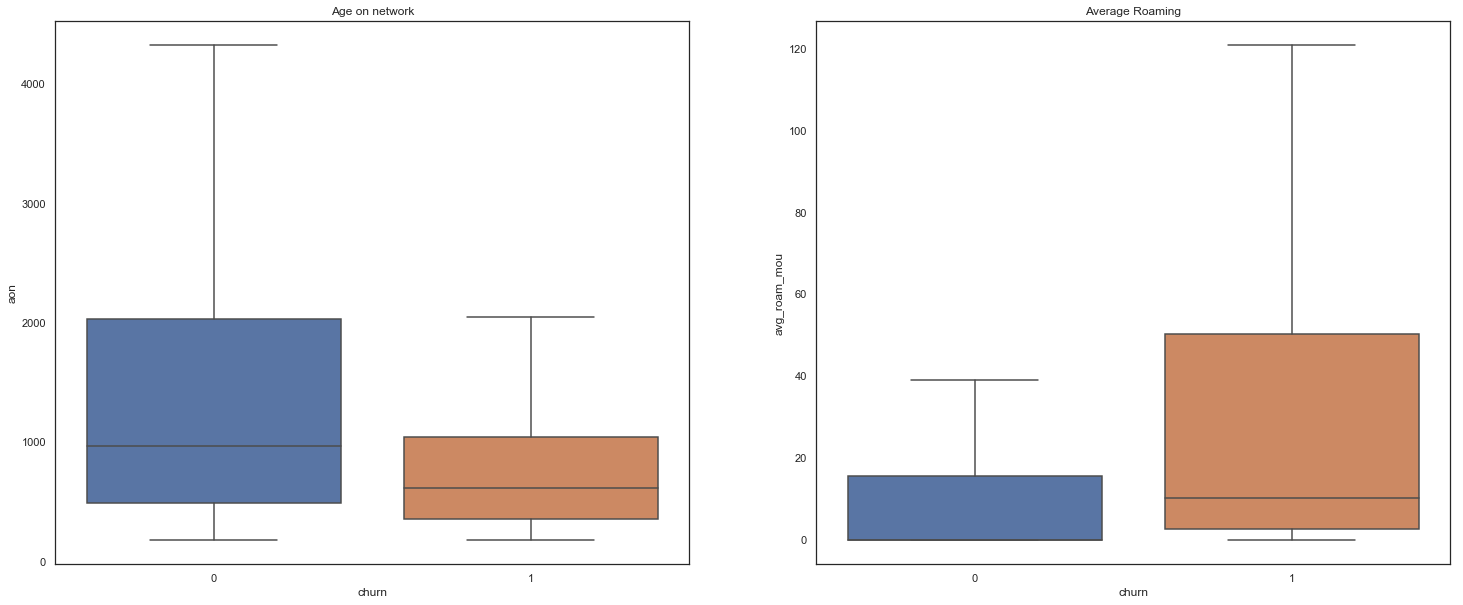

In [55]:
plt.figure(figsize=(25, 10))

# subplot 1
plt.subplot(1, 2, 1)
plt.title('Age on network')
ax=sns.boxplot(y=master.aon,x='churn',data=master, showfliers=False)

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Average Roaming')
ax1=sns.boxplot(y=master.avg_roam_mou,x='churn',data=master, showfliers=False)

##### Longer the user use the network the lesser the tendency they churn
##### More the Roaming service used, higher the tendency to churn

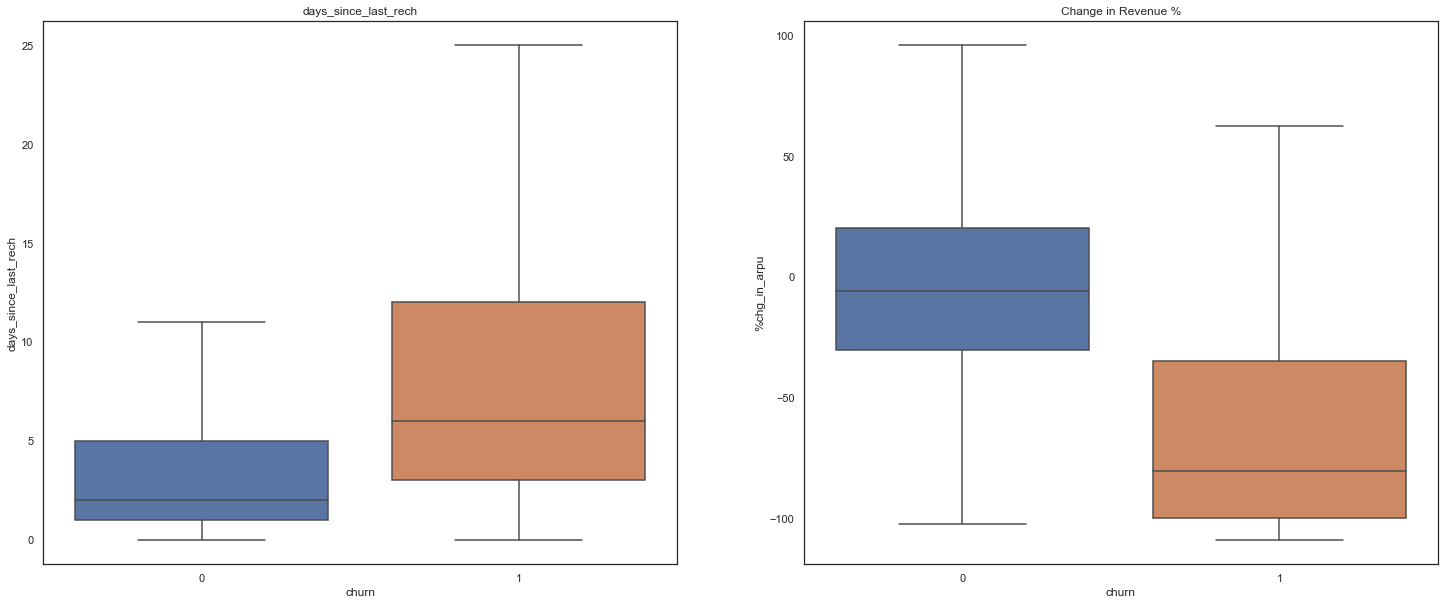

In [56]:
plt.figure(figsize=(25, 10))

# subplot 1
plt.subplot(1, 2, 1)
plt.title('days_since_last_rech')
sns.boxplot(y=master.days_since_last_rech,x='churn',data=master, showfliers=False)

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Change in Revenue %')
ax=sns.boxplot(y=master['%chg_in_arpu'],x='churn',data=master, showfliers=False)

##### More the days since last recharge, higher the tendency to churn
##### If the revenue generated by the user decreases, they are more likely to churn

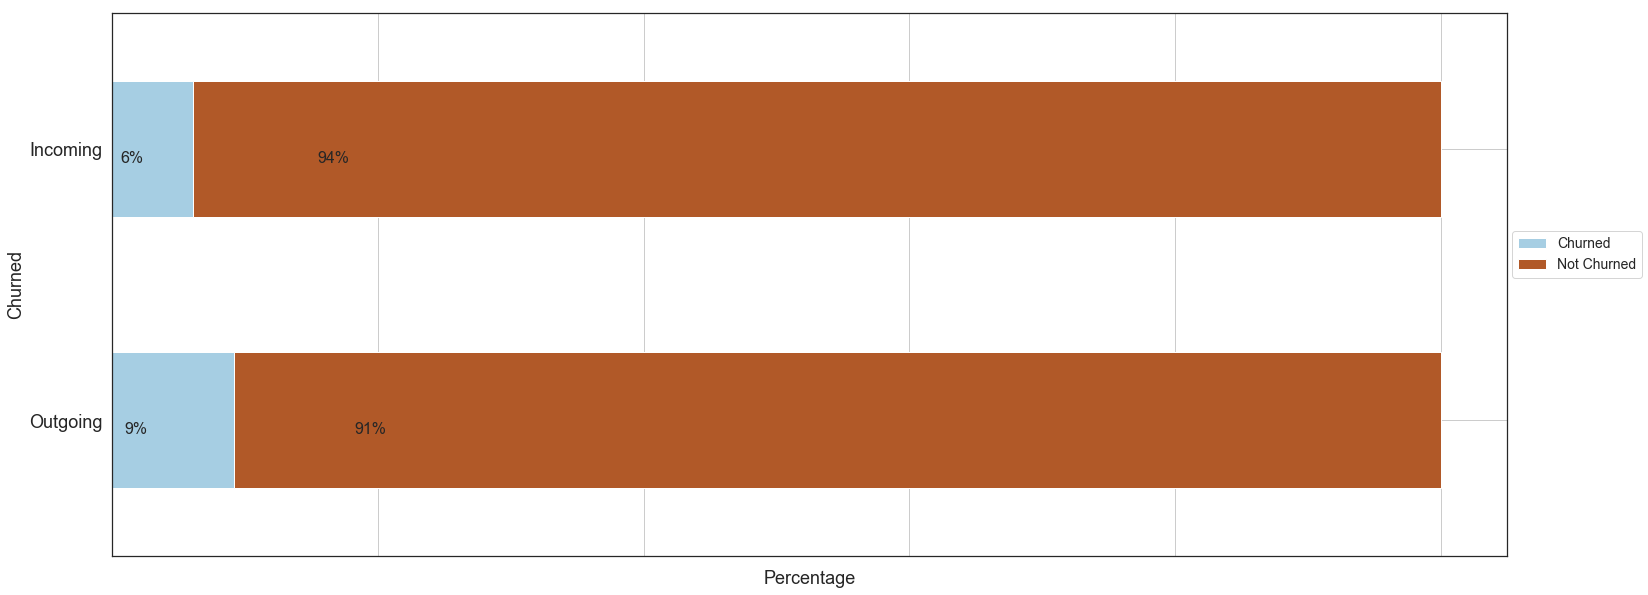

In [57]:
####Segmented plot by Incoming/Outgoing by Churn
ChurnedbyIncomingOutgoing = master.groupby(['customer_ic_og_display','churned_display'])['churned_display'].count()
segmentedPlot(ChurnedbyIncomingOutgoing,'barh',"Churned",display_value=1)

##### Customers who use outgoing services more tend to churn more

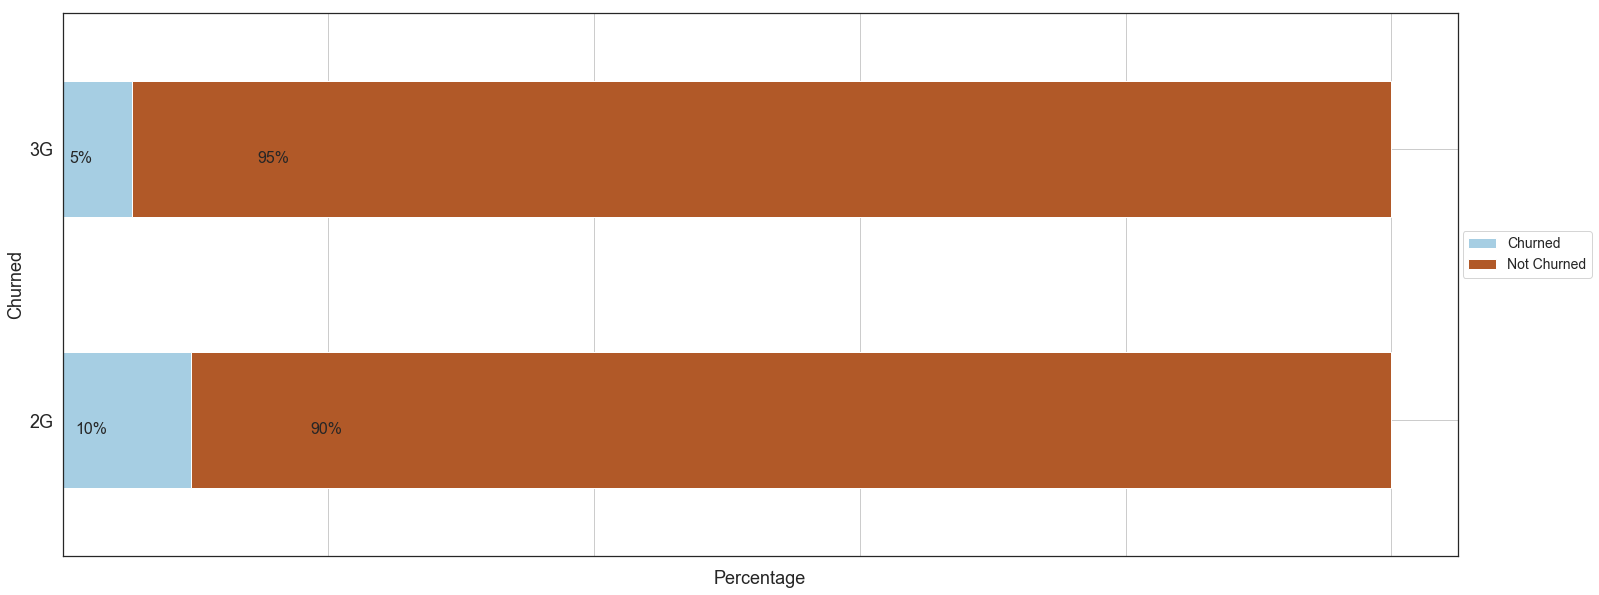

In [58]:
####Segmented plot by 2g/3g by Churn
Churnedby2g3g = master.groupby(['customer_2g_3g_display','churned_display'])['churned_display'].count()
segmentedPlot(Churnedby2g3g,'barh',"Churned",display_value=1)

##### Customers who use 2G services more tend to churn more than users who use 3G services

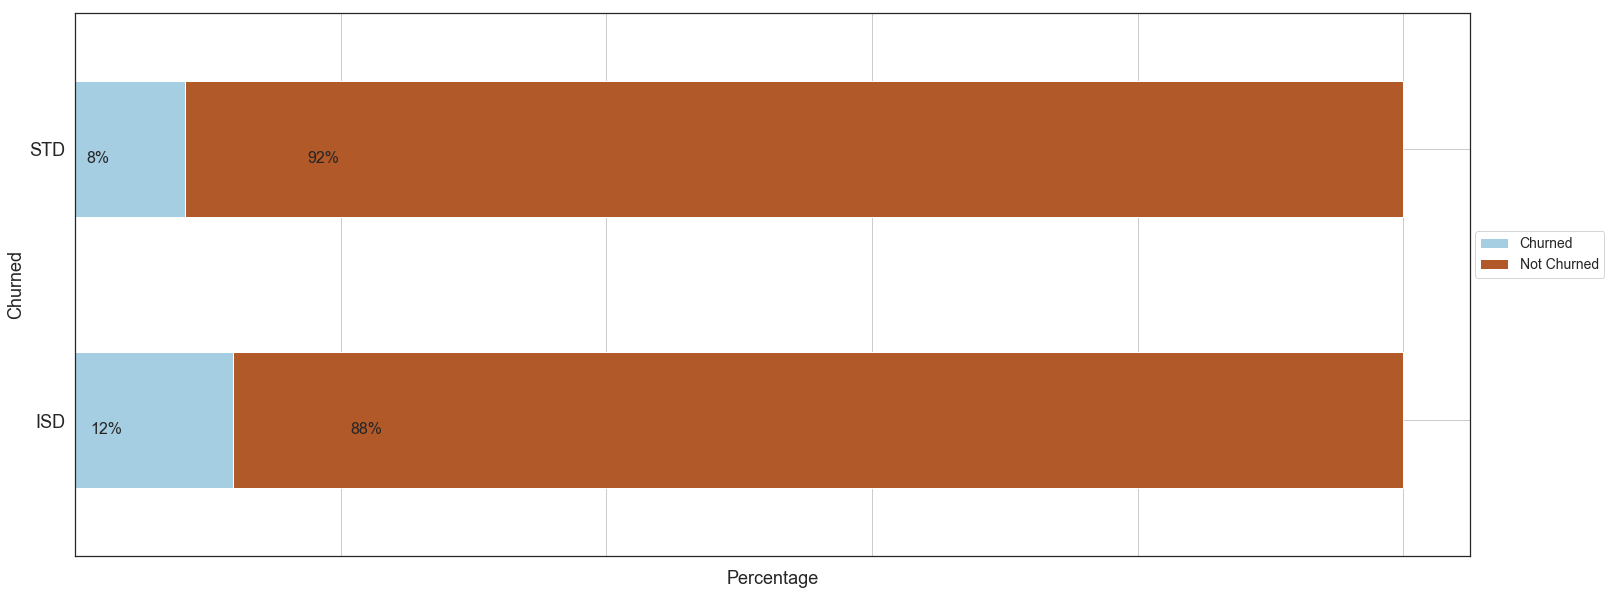

In [59]:
####Segmented plot by isd/std by Churn
Churnedbyogstdisd = master.groupby(['customer_og_std_isd_display','churned_display'])['churned_display'].count()
segmentedPlot(Churnedbyogstdisd,'barh',"Churned",display_value=1)

##### Customers who use ISD services tend to churn more than normal STD users

In [60]:
more_plots=pd.concat([master.churn,master.loc[:,(master.columns.str.contains("vol_2g") |
            master.columns.str.contains("vol_3g") | master.columns.str.contains("isd_og_mou") | 
            master.columns.str.contains("std_og_mou_") | master.columns.str.contains("isd_ic_mou") | 
            master.columns.str.contains("std_ic_mou_") )]],axis=1)
# more_plots.iloc[:,1:4]
more_plots['total_out_std'] = more_plots.iloc[:,1:4].sum(axis=1)
# more_plots.iloc[:,4:7]
more_plots['total_out_isd'] = more_plots.iloc[:,4:7].sum(axis=1)
# more_plots.iloc[:,7:10]
more_plots['total_in_std'] = more_plots.iloc[:,7:10].sum(axis=1)
# more_plots.iloc[:,10:13]
more_plots['total_in_isd'] = more_plots.iloc[:,10:13].sum(axis=1)
# more_plots.iloc[:,13:19]
more_plots['total_data'] = more_plots.iloc[:,13:19].sum(axis=1)
more_plots.drop(more_plots.columns[1:19],axis=1,inplace=True)
more_plots.describe()

,churn,total_out_std,total_out_isd,total_in_std,total_in_isd,total_data
count,29761.000000,29761.000000,29761.000000,29761.000000,29761.000000,29761.000000
mean,0.084070,1172.561033,6.467794,153.687781,35.322737,995.952359
std,0.277497,1652.631801,133.248872,386.815424,195.961032,2316.769116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.240000,0.000000,16.320000,0.000000,0.000000
50%,0.000000,495.510000,0.000000,55.690000,0.000000,0.000000
75%,0.000000,1777.970000,0.000000,147.250000,4.680000,1105.470000
max,1.000000,31381.250000,17072.480000,15570.110000,10375.710000,73272.320000


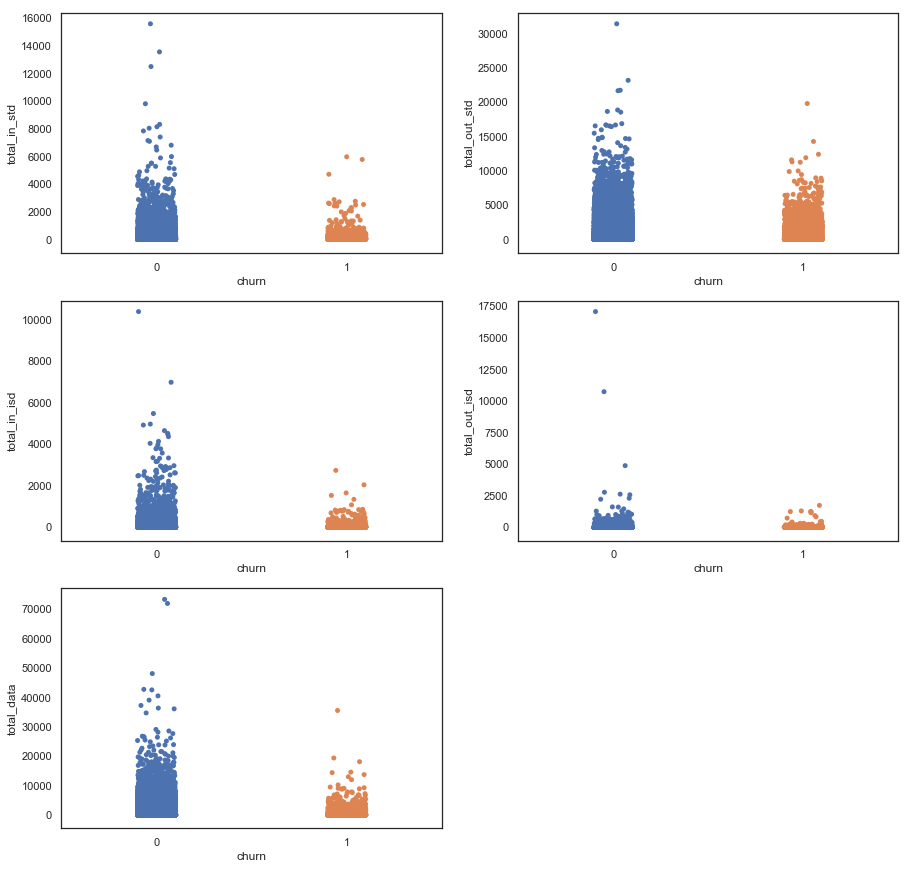

In [61]:
fig, axes = plt.subplots(3,2,figsize=(15,15))
sns.set_style("whitegrid")
sns.stripplot(x="churn", y = "total_in_std", data=more_plots, jitter=True, ax = axes[0,0])
sns.stripplot(x="churn", y = "total_out_std", data=more_plots, jitter=True, ax = axes[0,1])
sns.stripplot(x="churn", y = "total_in_isd", data=more_plots, jitter=True, ax = axes[1,0])
sns.stripplot(x="churn", y = "total_out_isd", data=more_plots, jitter=True, ax = axes[1,1])
sns.stripplot(x="churn", y = "total_data", data=more_plots, jitter=True, ax = axes[2,0])
fig.delaxes(axes[2,1])
plt.show()

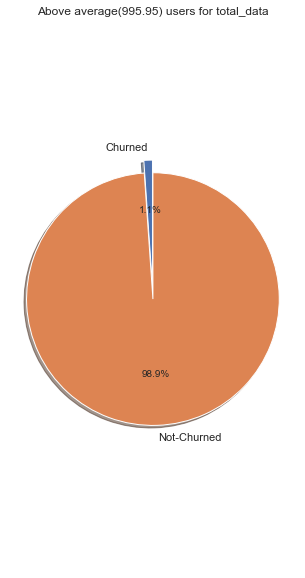

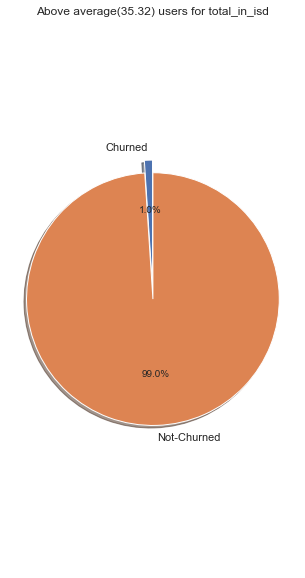

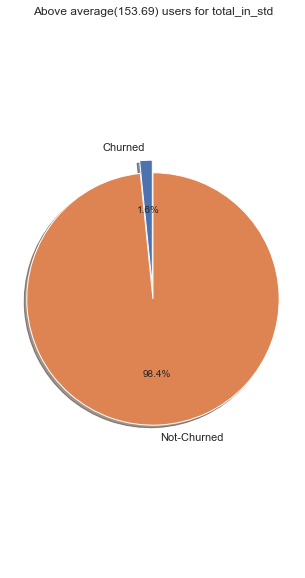

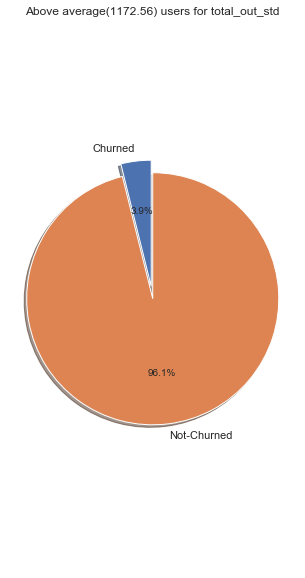

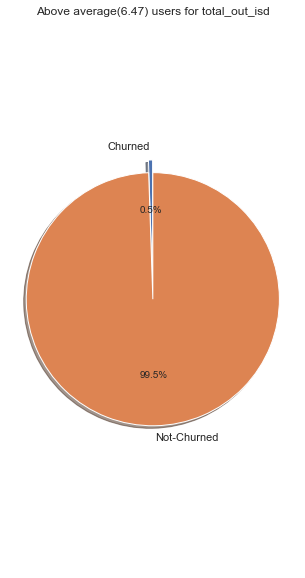

In [62]:
col_name = ['total_data','total_in_isd','total_in_std','total_out_std','total_out_isd']
avg_counts = {'total_data':0,'total_in_isd':0,'total_in_std':0,'total_out_std':0,'total_out_isd':0}
churn_counts = {'total_data':0,'total_in_isd':0,'total_in_std':0,'total_out_std':0,'total_out_isd':0}
for i in range(0,5):
    for index, row in more_plots.iterrows():
        if(row[col_name[i]] > more_plots[col_name[i]].mean()):
            avg_counts[col_name[i]] += 1
            if(row['churn'] == 1):
                churn_counts[col_name[i]] += 1
    labels = 'Churned', 'Not-Churned'
    sizes = [churn_counts[col_name[i]], more_plots[col_name[i]].count() - churn_counts[col_name[i]]]
    explode = (0.1, 0.0)
    fig1, ax1 = plt.subplots(figsize=(5,10))
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    ax1.set_title('Above average(' + str(round(more_plots[col_name[i]].mean(),2)) +') users for '+col_name[i])
    plt.show()

In [63]:
# We can see from the above figures that people who have used more than these values are almost not likely to churn. So we should focus on retaining the people below these values : 
print("Data: "+ str(round(more_plots['total_data'].mean(),2))+" MBs")
print("Incoming ISD Calls: "+ str(round(more_plots['total_in_isd'].mean(),2))+" Minutes")
print("Incoming STD Calls: "+ str(round(more_plots['total_in_std'].mean(),2))+" Minutes")
print("Outgoing STD Calls: "+ str(round(more_plots['total_out_std'].mean(),2))+" Minutes")
print("Outgoing ISD Calls: "+ str(round(more_plots['total_out_isd'].mean(),2))+" Minutes")

Data: 995.95 MBs
Incoming ISD Calls: 35.32 Minutes
Incoming STD Calls: 153.69 Minutes
Outgoing STD Calls: 1172.56 Minutes
Outgoing ISD Calls: 6.47 Minutes


In [64]:
# Drop the features that are created for EDA.
master = master.drop(['total_ic_og_diff','total_og_std_isd_diff','total_og_std_isd_diff',
                      'customer_2g_3g_display','customer_og_std_isd_display','churned_display',
                      'customer_ic_og_display','customer_ic_og','customer_og_std_isd',
                      'total_2g_3g_mb_diff','customer_2g_3g'], axis =1)

In [65]:
X=master.drop(['churn'],axis=1)
y=master['churn']
y.describe()

count    29761.000000
mean         0.084070
std          0.277497
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [66]:
master.churn.sum()

2502

In [67]:
master.shape

(29761, 163)

##### Churned cases are still intact around 8.4% after data preprocessing

# Modelling Approach

##### Approach is to have Logistic Regression as a base line model and other models will be benchmarked against it
##### Since the data is imbalanced SVM models will be excluded as they dont perform well with imbalanced data
##### For imbalanced data, combination of few techniques such as SMOTE , class_weight , stratified K fold and Tree methods will be used
##### Logistic Regression will be used as baseline model for benchmarking as well to idenfity import features that determine the churn rate
##### Since the number of features is quite large, PCA will be used to reduce the dimensionality and further tree based model will be implemented
##### As its important to identify churners than the non-churners accurately, we need to consider Recall score(Accuracy when user is really churning). However with high Recall, precision (how accurate when the model claims churn) of the model will go down. Therefore, in order to have a trade off between how conservative/liberal the model is, we need a balance between Precision and Recall. Therefore F1 score will be used as final evaluation metric along with AUC score
##### Finally gradient boosting will be used for model perfromace improvements

## 1. Base Model - Logistic Regression

##### Since all fetaures are numerical, logistic regression is a good choice. However training would take long time as the number of features are quite high.Moreover data is highly multicollinear. 
##### So approach would be to automatically eliminate the features that are not significant and redundant and build model on top of that

In [68]:
#### Perform Normalization 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 4)
sc=StandardScaler()
Xtrain=pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
Xtest=pd.DataFrame(sc.transform(X_test),columns=X.columns)

In [69]:
####Over Sampling using SMOTE to handle imbalanced dataset
smote = SMOTE(random_state=4)
Xtrain_s,y_train_s=smote.fit_sample(Xtrain, y_train)
Xtrain_s = pd.DataFrame(data=Xtrain_s,columns=X.columns)

In [70]:
####Function to calculate VIF
def vif_cal(input_data):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        x_withC = sm.add_constant(x)
        rsq=sm.OLS(y,x_withC).fit().rsquared  
        if rsq==1: rsq=0.99999
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

### 1.1 Logistic Regression Model Building with RFE

In [70]:
logreg = LogisticRegression(class_weight='balanced')
start=time.time()
rfe = RFE(logreg, 12)            
rfe = rfe.fit(Xtrain_s, y_train_s)
print(rfe.support_)           
print(rfe.ranking_)           
print(time.time()-start , 'seconds to run')

[False False False False False False False False  True False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False  True False False False
 False False False False False False False False False False False False
 False  True  True False False False False False False False False False
 False False False False False False False False  True False False  True
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False  True False False False False]
[132  31  22 

In [71]:
cols_rfe=Xtrain.columns[rfe.support_]
cols_rfe

Index(['offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'days_since_last_rech',
       '%chg_in_rech_amt'],
      dtype='object')

In [72]:
#Calculate VIF and print results
logm1 = sm.GLM(y_train_s,(sm.add_constant(Xtrain_s[cols_rfe])), family = sm.families.Binomial())
print(logm1.fit().summary())
print(vif_cal(Xtrain_s[cols_rfe]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38206
Model:                            GLM   Df Residuals:                    38193
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -15057.
Date:                Sun, 18 Nov 2018   Deviance:                       30113.
Time:                        20:16:47   Pearson chi2:                 3.38e+05
No. Iterations:                     7                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8973      0.028    -67.202      0.000      -1.953      -1.842
offnet_mou_8          

In [73]:
#Calculate VIF and print results
# Let us drop total_ic_mou_8 has it's has high VIF
cols_rfe=['offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_7','loc_ic_mou_8', 
          'total_ic_mou_7', 'max_rech_amt_8','last_day_rch_amt_8', 'max_rech_data_8', 
          'days_since_last_rech','%chg_in_rech_amt']

logm2 = sm.GLM(list(y_train_s),(sm.add_constant(Xtrain_s[cols_rfe])), family = sm.families.Binomial())
logm2.fit().summary()
print(logm2.fit().summary())
print(vif_cal(Xtrain_s[cols_rfe]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38206
Model:                            GLM   Df Residuals:                    38194
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -15197.
Date:                Sun, 18 Nov 2018   Deviance:                       30395.
Time:                        20:17:02   Pearson chi2:                 4.86e+05
No. Iterations:                     7                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8640      0.028    -66.625      0.000      -1.919      -1.809
offnet_mou_8          

In [74]:
#Calculate VIF and print results
# Let us drop total_ic_mou_7 has it's has high P value
cols_rfe=['offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_7','loc_ic_mou_8', 
          'max_rech_amt_8','last_day_rch_amt_8', 'max_rech_data_8','days_since_last_rech','%chg_in_rech_amt']

logm3 = sm.GLM(list(y_train_s),(sm.add_constant(Xtrain_s[cols_rfe])), family = sm.families.Binomial())
logm3.fit().summary()
print(logm3.fit().summary())
print(vif_cal(Xtrain_s[cols_rfe]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38206
Model:                            GLM   Df Residuals:                    38195
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -15197.
Date:                Sun, 18 Nov 2018   Deviance:                       30395.
Time:                        20:17:29   Pearson chi2:                 4.84e+05
No. Iterations:                     7                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8640      0.028    -66.627      0.000      -1.919      -1.809
offnet_mou_8          

In [75]:
#Calculate VIF and print results
# Let us drop offnet_mou_8   has it's has high VIF

cols_rfe=['roam_og_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_7','loc_ic_mou_8', 'max_rech_amt_8',
          'last_day_rch_amt_8', 'max_rech_data_8','days_since_last_rech','%chg_in_rech_amt']


logm4 = sm.GLM(list(y_train_s),(sm.add_constant(Xtrain_s[cols_rfe])), family = sm.families.Binomial())
logm4.fit().summary()
print(logm4.fit().summary())
print(vif_cal(Xtrain_s[cols_rfe]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38206
Model:                            GLM   Df Residuals:                    38196
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -15377.
Date:                Sun, 18 Nov 2018   Deviance:                       30753.
Time:                        20:17:38   Pearson chi2:                 8.10e+05
No. Iterations:                     7                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8358      0.028    -65.907      0.000      -1.890      -1.781
roam_og_mou_8         

#### The P value is in control. So, Let us now baseline this and proceed with Modelling

### 1.2 Logistic Regression Model Evaluation

In [76]:
# LR without hyperparameter tunning
log_updated= LogisticRegression()
log_updated.fit(Xtrain[cols_rfe], (y_train))
predictions = log_updated.predict(Xtest[cols_rfe])
probas=log_updated.predict_proba(Xtest[cols_rfe])
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy->" ,accuracy_score(y_test,predictions))
print("AUC->",metrics.roc_auc_score(y_test,probas[:, 1]))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8156
           1       0.61      0.19      0.29       773

   micro avg       0.92      0.92      0.92      8929
   macro avg       0.77      0.59      0.62      8929
weighted avg       0.90      0.92      0.90      8929

[[8061   95]
 [ 627  146]]
Accuracy-> 0.9191398812856982
AUC-> 0.8768323957092833


### 1.3 Hyper-parameter Tuning

#### 1.3.1 Evaluation Metric - Recall

In [77]:
weights = np.linspace(0.05, 0.95, 10)
parameters = {'class_weight': [{0: x, 1: 1.0-x} for x in weights]}

log1 = LogisticRegression()

cv1= GridSearchCV(log1, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=5), 
                   scoring="recall",
                   verbose = 1)
cv1.fit(Xtrain[cols_rfe], y_train)

log_updated= LogisticRegression(class_weight= cv1.best_params_['class_weight'])
log_updated.fit(Xtrain[cols_rfe], (y_train))
predictions = log_updated.predict(Xtest[cols_rfe])
probas=log_updated.predict_proba(Xtest[cols_rfe])
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy->" ,accuracy_score(y_test,predictions))
print("AUC->",metrics.roc_auc_score(y_test,probas[:, 1]))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.3s finished


              precision    recall  f1-score   support

           0       0.98      0.71      0.83      8156
           1       0.23      0.88      0.36       773

   micro avg       0.73      0.73      0.73      8929
   macro avg       0.61      0.80      0.59      8929
weighted avg       0.92      0.73      0.79      8929

[[5824 2332]
 [  93  680]]
Accuracy-> 0.7284130361742637
AUC-> 0.8813749605842601


#### 1.3.2 Evaluation Metric - F1 

In [78]:
weights = np.linspace(0.05, 0.95, 10)
parameters = {'class_weight': [{0: x, 1: 1.0-x} for x in weights]}

log1 = LogisticRegression()

cv1= GridSearchCV(log1, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=5), 
                   scoring="f1",
                   verbose = 1)
cv1.fit(Xtrain[cols_rfe], y_train)

log_updated= LogisticRegression(class_weight= cv1.best_params_['class_weight'])
log_updated.fit(Xtrain[cols_rfe], (y_train))
predictions = log_updated.predict(Xtest[cols_rfe])
probas=log_updated.predict_proba(Xtest[cols_rfe])
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy->" ,accuracy_score(y_test,predictions))
print("AUC->",metrics.roc_auc_score(y_test,probas[:, 1]))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.9s finished


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8156
           1       0.51      0.62      0.56       773

   micro avg       0.92      0.92      0.92      8929
   macro avg       0.74      0.78      0.76      8929
weighted avg       0.92      0.92      0.92      8929

[[7703  453]
 [ 296  477]]
Accuracy-> 0.9161160264307313
AUC-> 0.8787146757250434


##### On tuning for sensitivity , we get a best score of 88% . However the precision is very low at 23% ie only one in four churned cases is accurately predicted

##### When trying to balance sensitivity and precision, we get a best model for logistic regression with F1 score of 0.56 and with accuracy rate of 91.6%

##### Important features predicted by Logistic regression model are-
1) max_rech_amt_8  
2) loc_ic_mou_8  
3) last_day_rch_amt_8  
4) loc_ic_t2m_mou_7  
5) %chg_in_rech_amt  
6) max_rech_data_8  
7) days_since_last_rech  
8) std_og_t2m_mou_8  
9) roam_og_mou_8 

##### Since Logistic regression doesn't work with large number of fetaures, Dimensionality reduction technique will be employed to see if it gives a better performance

## 2. PCA

In [71]:
####PCA explaining 90% of the variance
pca = PCA(0.90,random_state=4)

In [72]:
pca.fit(Xtrain)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=4,
  svd_solver='auto', tol=0.0, whiten=False)

In [73]:
####Number of PC features required to explain 90% of the variance
pca.n_components_

56

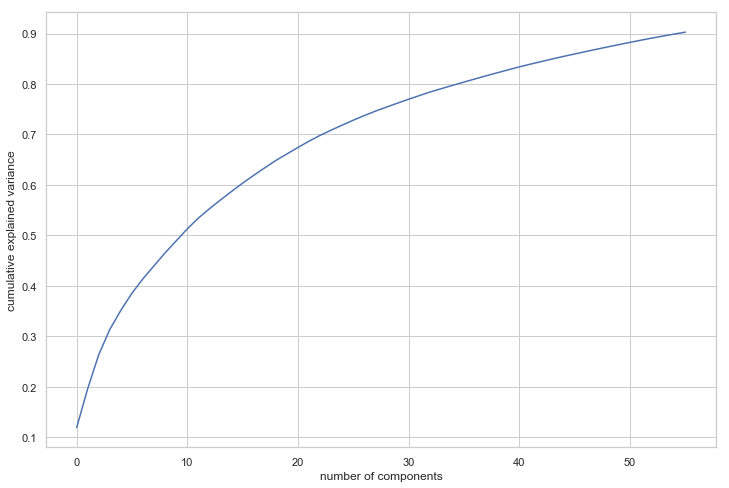

In [74]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [75]:
####PC components of training and test set
Xtrainpc = pca.transform(Xtrain)
Xtestpc = pca.transform(Xtest)

In [76]:
####Logistic regression model on top of PCA
log_updatedpca= LogisticRegression(class_weight= 'balanced')
log_updatedpca.fit(Xtrainpc, (y_train))
predictions = log_updatedpca.predict(Xtestpc)
probas=log_updatedpca.predict_proba(Xtestpc)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy->" ,accuracy_score(y_test,predictions))
print("AUC->",metrics.roc_auc_score(y_test,probas[:, 1]))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8156
           1       0.31      0.81      0.45       773

   micro avg       0.83      0.83      0.83      8929
   macro avg       0.65      0.82      0.67      8929
weighted avg       0.92      0.83      0.86      8929

[[6768 1388]
 [ 144  629]]
Accuracy-> 0.8284242356366894
AUC-> 0.8886805926096994


##### We dont see a better performance with Logistic regression model on top of PCA
##### Lets try using Random Forest on top of PCA

## 3. Random Forest with PCA

### 3.1 Model Building

In [77]:
rfc = RandomForestClassifier(class_weight='balanced',random_state=4)
rfc.fit(Xtrainpc,y_train)
predictions = rfc.predict(Xtestpc)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy->", accuracy_score(y_test,predictions))
print("AUC->",metrics.roc_auc_score(y_test,probas[:, 1]))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8156
           1       0.66      0.16      0.26       773

   micro avg       0.92      0.92      0.92      8929
   macro avg       0.79      0.58      0.61      8929
weighted avg       0.90      0.92      0.90      8929

[[8092   64]
 [ 648  125]]
Accuracy-> 0.9202598275282786
AUC-> 0.8886805926096994


##### f1 score is very low, so lets try tuning some hyper-parameters

In [86]:
def plot(param,param_value,scoring,scores):
    plt.figure()
    plt.plot(scores[param_value],
             scores["mean_train_score"], 
             label="training accuracy")
    plt.plot(scores[param_value], 
             scores["mean_test_score"], 
             label="test accuracy")
    plt.xlabel(param)
    plt.ylabel(scoring)
    plt.legend()
    plt.show()

### 3.2 Hyper-parameter Tuning

####  3.2.1 Hyper-parameter Tuning based on f1 score

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   19.9s finished


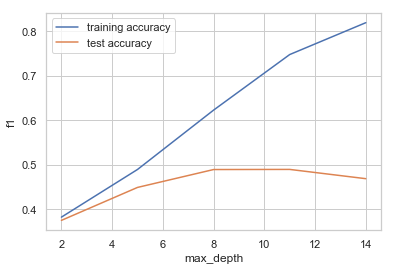

{'max_depth': 11}


In [87]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': range(2, 15, 3)}

rfc = RandomForestClassifier(class_weight='balanced',random_state=4)

rf_f1_cv1 = GridSearchCV(rfc, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=5), 
                   scoring="f1",
                   verbose = 1)
rf_f1_cv1.fit(Xtrainpc, y_train)

plot("max_depth","param_max_depth","f1",rf_f1_cv1.cv_results_)
print(rf_f1_cv1.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   52.5s finished


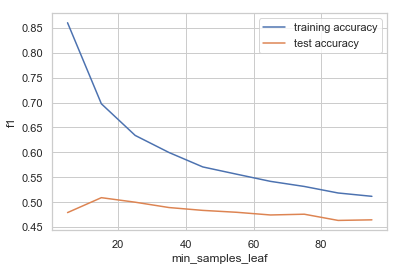

{'min_samples_leaf': 15}


In [88]:
parameters = {'min_samples_leaf': range(5, 100, 10)}

rfc = RandomForestClassifier(class_weight='balanced',random_state=4)

rf_f1_cv2 = GridSearchCV(rfc, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=5), 
                   scoring="f1",
                   verbose = 1)

rf_f1_cv2.fit(Xtrainpc, y_train)

plot("min_samples_leaf","param_min_samples_leaf","f1",rf_f1_cv2.cv_results_)
print(rf_f1_cv2.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   42.9s finished


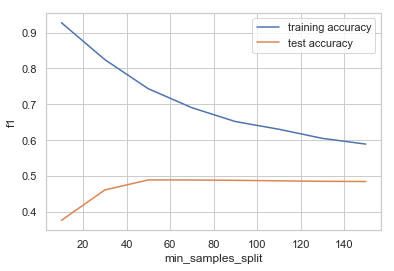

{'min_samples_split': 50}


In [89]:
parameters = {'min_samples_split': range(10, 160 , 20)}

rfc = RandomForestClassifier(class_weight='balanced',random_state=4)

rf_f1_cv3 = GridSearchCV(rfc, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=5), 
                   scoring="f1",
                   verbose = 1)

rf_f1_cv3.fit(Xtrainpc, y_train)

plot("min_samples_split","param_min_samples_split","f1",rf_f1_cv3.cv_results_)
print(rf_f1_cv3.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   55.7s finished


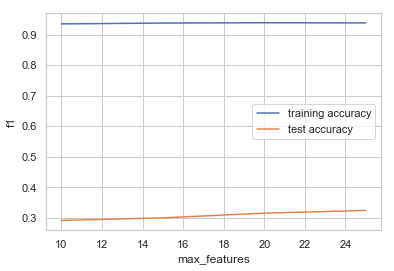

{'max_features': 25}


In [90]:
parameters = {'max_features': range(10, 30 , 5)}

rfc = RandomForestClassifier(class_weight='balanced',random_state=4)

rf_f1_cv4 = GridSearchCV(rfc, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=5), 
                   scoring="f1",
                   verbose = 1)

rf_f1_cv4.fit(Xtrainpc, y_train)

plot("max_features","param_max_features","f1",rf_f1_cv4.cv_results_)
print(rf_f1_cv4.best_params_)

####  3.2.2 Hyper-parameter Tuning based on recall score

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   19.2s finished


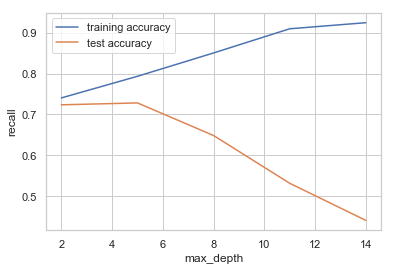

{'max_depth': 5}


In [91]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': range(2, 15, 3)}

rfc = RandomForestClassifier(class_weight='balanced',random_state=4)

rf_recall_cv1 = GridSearchCV(rfc, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=5), 
                   scoring="recall",
                   verbose = 1)
rf_recall_cv1.fit(Xtrainpc, y_train)

plot("max_depth","param_max_depth","recall",rf_recall_cv1.cv_results_)
print(rf_recall_cv1.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   41.4s finished


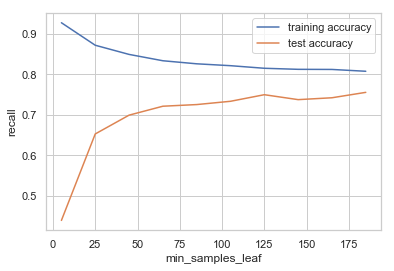

{'min_samples_leaf': 185}


In [92]:
parameters = {'min_samples_leaf': range(5, 200, 20)}

rfc = RandomForestClassifier(class_weight='balanced',random_state=4)

rf_recall_cv2 = GridSearchCV(rfc, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=5), 
                   scoring="recall",
                   verbose = 1)

rf_recall_cv2.fit(Xtrainpc, y_train)

plot("min_samples_leaf","param_min_samples_leaf","recall",rf_recall_cv2.cv_results_)
print(rf_recall_cv2.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   42.5s finished


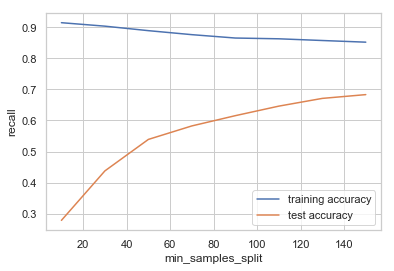

{'min_samples_split': 150}


In [93]:
parameters = {'min_samples_split': range(10, 160 , 20)}

rfc = RandomForestClassifier(class_weight='balanced',random_state=4)

rf_recall_cv3 = GridSearchCV(rfc, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=5), 
                   scoring="recall",
                   verbose = 1)

rf_recall_cv3.fit(Xtrainpc, y_train)

plot("min_samples_split","param_min_samples_split","recall",rf_recall_cv3.cv_results_)
print(rf_recall_cv3.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   57.2s finished


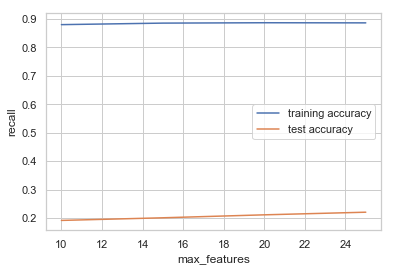

{'max_features': 25}


In [94]:
parameters = {'max_features': range(10, 30 , 5)}

rfc = RandomForestClassifier(class_weight='balanced',random_state=4)

rf_recall_cv4 = GridSearchCV(rfc, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=5), 
                   scoring="recall",
                   verbose = 1)

rf_recall_cv4.fit(Xtrainpc, y_train)

plot("max_features","param_max_features","recall",rf_recall_cv4.cv_results_)
print(rf_recall_cv4.best_params_)

### 3.3 Model Evaluation

#### 3.3.1 Model Evaluation based on f1 score

In [95]:
rfc = RandomForestClassifier(max_depth=11,min_samples_split=50,min_samples_leaf=15,
                             max_features=25,class_weight='balanced',random_state=4)

rfc.fit(Xtrainpc,y_train)

predictions = rfc.predict(Xtestpc)
probas=rfc.predict_proba(Xtestpc)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy->", accuracy_score(y_test,predictions))
print("AUC->",metrics.roc_auc_score(y_test,probas[:, 1]))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      8156
           1       0.42      0.63      0.51       773

   micro avg       0.89      0.89      0.89      8929
   macro avg       0.69      0.77      0.72      8929
weighted avg       0.92      0.89      0.90      8929

[[7490  666]
 [ 286  487]]
Accuracy-> 0.8933811177063501
AUC-> 0.8739807422784804


#### 3.3.2 Model Evaluation based on recall score

In [96]:
rfc = RandomForestClassifier(max_depth=5,min_samples_split=150,min_samples_leaf=185,
                             max_features=25,class_weight='balanced',random_state=4)

rfc.fit(Xtrainpc,y_train)

predictions = rfc.predict(Xtestpc)
probas=rfc.predict_proba(Xtestpc)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy->", accuracy_score(y_test,predictions))
print("AUC->",metrics.roc_auc_score(y_test,probas[:, 1]))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      8156
           1       0.31      0.71      0.43       773

   micro avg       0.84      0.84      0.84      8929
   macro avg       0.64      0.78      0.67      8929
weighted avg       0.91      0.84      0.86      8929

[[6906 1250]
 [ 221  552]]
Accuracy-> 0.8352559077164297
AUC-> 0.8595233344351764


##### Random Forest on top of PCA doesn't give a better performance than our Base line model - Logistic Regression
##### Lets try to improve the perfomance of the model using gradient boosting technique specifically XGBoost on the entire set of features as we know XGBoost works well with high dimensonal data and imbalanced classes  

## 4. XGBOOST

### 4.1 Hyper-parameter Tuning

##### We will tune parameters responsible for handling imbalanced data mainly scale_pos_weight and subsample

#### 4.1.1 Hyper-parameter Tuning based on f1 score

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  6.7min finished


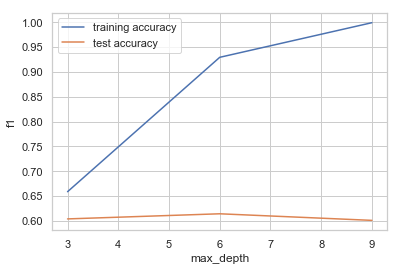

{'max_depth': 6}


In [97]:
import xgboost as xgb
parameters = {'max_depth': range(3, 12, 3)}

xgb = xgb.XGBClassifier(random_state=4)

gbm_f1_cv1 = GridSearchCV(xgb, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=4), 
                   scoring="f1",
                   verbose = 1)
gbm_f1_cv1.fit(X_train, y_train)

plot("max_depth","param_max_depth","f1",gbm_f1_cv1.cv_results_)
print(gbm_f1_cv1.best_params_)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  5.0min finished


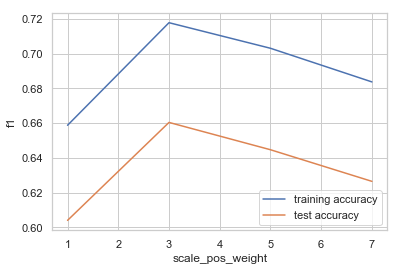

{'scale_pos_weight': 3}


In [98]:
import xgboost as xgb
parameters = {'scale_pos_weight': [1,3,5,7]}

xgb = xgb.XGBClassifier(random_state=4)

gbm_f1_cv2 = GridSearchCV(xgb, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=4), 
                   scoring="f1",
                   verbose = 1)
gbm_f1_cv2.fit(X_train, y_train)
plot("scale_pos_weight","param_scale_pos_weight","f1",gbm_f1_cv2.cv_results_)
print(gbm_f1_cv2.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  4.8min finished


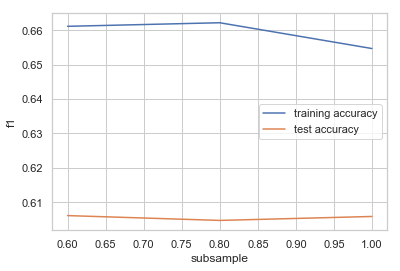

{'subsample': 0.6}


In [99]:
import xgboost as xgb
parameters = {'subsample': [0.6,0.8,1]}

xgb = xgb.XGBClassifier(random_state=4)

gbm_f1_cv3 = GridSearchCV(xgb, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=5), 
                   scoring="f1",
                   verbose = 1)
gbm_f1_cv3.fit(X_train, y_train)
plot("subsample","param_subsample","f1",gbm_f1_cv3.cv_results_)
print(gbm_f1_cv3.best_params_)

#### 4.1.2 Hyper-parameter Tuning based on recall score

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  6.6min finished


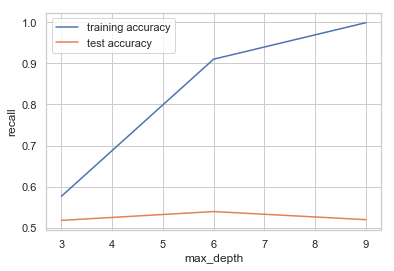

{'max_depth': 6}


In [100]:
import xgboost as xgb
parameters = {'max_depth': [3,6,9]}

xgb = xgb.XGBClassifier(random_state=4)

gbm_recall_cv1 = GridSearchCV(xgb, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=4), 
                   scoring="recall",
                   verbose = 1)
gbm_recall_cv1.fit(X_train, y_train)

plot("max_depth","param_max_depth","recall",gbm_recall_cv1.cv_results_)
print(gbm_recall_cv1.best_params_)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  5.1min finished


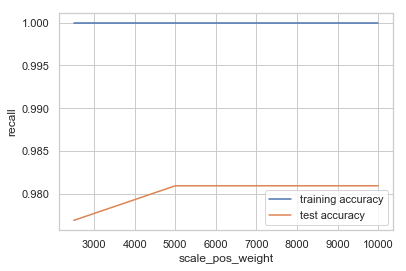

{'scale_pos_weight': 7500}


In [102]:
import xgboost as xgb
parameters = {'scale_pos_weight': [2500,5000,7500,10000]}

xgb = xgb.XGBClassifier(random_state=4)

gbm_recall_cv2 = GridSearchCV(xgb, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=4), 
                   scoring="recall",
                   verbose = 1)
gbm_recall_cv2.fit(X_train, y_train)

plot("scale_pos_weight","param_scale_pos_weight","recall",gbm_recall_cv2.cv_results_)
print(gbm_recall_cv2.best_params_)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  4.8min finished


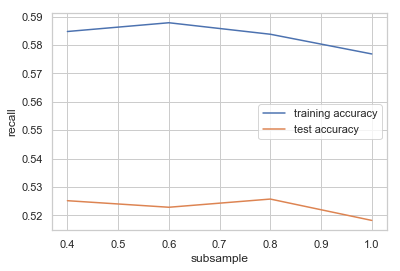

{'subsample': 0.8}


In [103]:
import xgboost as xgb
parameters = {'subsample': [0.4,0.6,0.8,1]}

xgb = xgb.XGBClassifier(random_state=4)

gbm_recall_cv3 = GridSearchCV(xgb, 
                   parameters, 
                   cv=StratifiedKFold(n_splits=4), 
                   scoring="recall",
                   verbose = 1)
gbm_recall_cv3.fit(X_train, y_train)
plot("subsample","param_subsample","recall",gbm_recall_cv3.cv_results_)
print(gbm_recall_cv3.best_params_)

### 4.2 Model Evaluation

#### 4.2.1 Model Evaluation based on f1 score

In [104]:
import xgboost as xgb
gbm_f1 = xgb.XGBClassifier(subsample=0.6 ,scale_pos_weight=3, max_depth=6,random_state=4)

gbm_f1.fit(X_train,y_train)

predictions = gbm_f1.predict(X_test)
probas=gbm_f1.predict_proba(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy->", accuracy_score(y_test,predictions))
print("AUC->",metrics.roc_auc_score(y_test,probas[:, 1]))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8156
           1       0.67      0.66      0.67       773

   micro avg       0.94      0.94      0.94      8929
   macro avg       0.82      0.82      0.82      8929
weighted avg       0.94      0.94      0.94      8929

[[7903  253]
 [ 260  513]]
Accuracy-> 0.9425467577556277
AUC-> 0.9471708539876039


#### 4.2.2 Model Evaluation based on recall score

In [105]:
import xgboost as xgb
gbm_recall = xgb.XGBClassifier(subsample=0.8 ,scale_pos_weight=7500, max_depth=6,random_state=4)

gbm_recall.fit(X_train,y_train)

predictions = gbm_recall.predict(X_test)
probas=gbm_recall.predict_proba(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy->", accuracy_score(y_test,predictions))
print("AUC->",metrics.roc_auc_score(y_test,probas[:, 1]))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      8156
           1       0.22      0.92      0.35       773

   micro avg       0.71      0.71      0.71      8929
   macro avg       0.60      0.80      0.58      8929
weighted avg       0.92      0.71      0.77      8929

[[5618 2538]
 [  61  712]]
Accuracy-> 0.7089259715533655
AUC-> 0.9191215191222647


##### We get best performance in terms of sensitivity (92%) and f1 (67%) with XGBoost. As for as final evaluation metric we are choosing the one with best F1 score as with the other one precision is very low (only 1 in 5 cases which the model predicts is correct)

##### gbm_f1 is the final model selected with f1 score of 0.67 and accuracy of 94%

### 4.3 Important Churn Indicators 

In [106]:
sfm = SelectFromModel(gbm_f1, threshold=0.015) 
sfm.fit(X_train,y_train)

X_train_1 = sfm.transform(X_train)
X_test_1 = sfm.transform(X_test)

shape = np.shape(X_train_1)

print(X_train.columns[sfm.get_support()]) 

Index(['arpu_6', 'arpu_7', 'roam_ic_mou_8', 'roam_og_mou_8', 'total_ic_mou_8',
       'last_day_rch_amt_8', 'aon', 'days_since_last_rech', '%chg_in_arpu',
       '%chg_in_rech_amt'],
      dtype='object')


## 5. Summary of Models

### Comparison with different models 

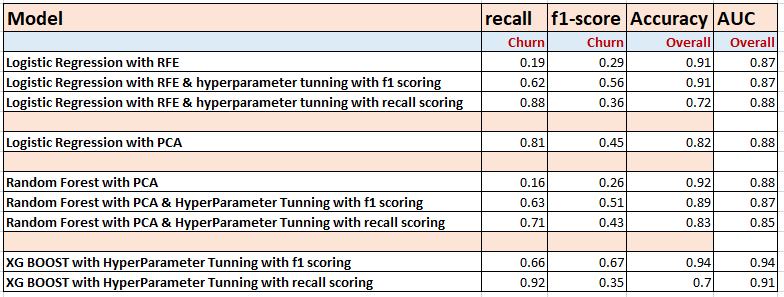

#####  As  you can see the model with XG Boost with F1 scoring performs well with all other models

## 6. Analysis of predicted important churn indicators

In [78]:
churned_df = master[master.churn==1]

In [79]:
columns_best = ['arpu_6', 'arpu_7','roam_ic_mou_8', 'roam_og_mou_8', 'loc_ic_t2m_mou_8','total_ic_mou_8',
                'last_day_rch_amt_8', 'aon', 'days_since_last_rech', '%chg_in_arpu', '%chg_in_rech_amt']
churned_df_new = master[columns_best]
churned_df_new.describe()

,arpu_6,arpu_7,roam_ic_mou_8,roam_og_mou_8,loc_ic_t2m_mou_8,total_ic_mou_8,last_day_rch_amt_8,aon,days_since_last_rech,%chg_in_arpu,%chg_in_rech_amt
count,29761.000000,29761.000000,29761.000000,29761.000000,29761.000000,29761.000000,29761.000000,29761.000000,29761.000000,29761.000000,29761.000000
mean,586.743514,589.575434,13.505386,21.691983,154.842002,297.720618,94.896005,1267.892947,4.797621,-5.340791,-9.926419
std,440.792215,461.681392,74.823441,106.654935,217.475089,360.864632,143.339877,976.173687,7.483553,124.848685,56.018662
min,-2258.709000,-2014.045000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,-3202.906623,-100.000000
25%,364.139000,365.495000,0.000000,0.000000,30.840000,81.040000,7.000000,480.000000,1.000000,-35.832063,-42.359249
50%,495.722000,494.168000,0.000000,0.000000,90.890000,195.340000,50.000000,921.000000,3.000000,-9.063405,-11.841249
75%,703.406000,700.891000,0.000000,0.000000,198.310000,382.780000,130.000000,1935.000000,6.000000,18.181082,17.786561
max,27731.088000,35145.834000,4169.810000,5337.040000,5738.460000,5990.710000,4449.000000,4321.000000,85.000000,15952.137643,1193.714286


## 7. Business recommendations

#### Aon : We should start focusing on customers who have been with us for more than 180 days now, we should take relevant feedback on many occasions and try to resolve any issues if they are facing. Moreover customers who are using the network for more than 920 days (50% value) , we can provide them with additional benefits so as to retain them.
#### %chg_in_arpu : If we are seeing a negative change then we must focus on these customers and ask them why are they not using our services and take corrective action.
#### roam_ic_mou_8 &  roam_og_mou_8 : As we see that two churn indicators out of 9 are for usage on roaming we should definitely try to bring a new plan which lures the customers those who have usage on during roaming.